In [25]:
from collections import defaultdict
import networkx as nx
import pandas as pd

/Users/chuhanli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [16]:
nodes = {'Barn Is.',
 'Block Island',
 'Bluff Point',
 'Charlestown',
 'East Greenwich',
 'Exeter',
 'Foxwoods',
 'Freston',
 'Gales Ferry',
 'Griswold',
 'Groton',
 'Hopkinton',
 'Jamestown',
 'Ledyard',
 'Lisbon',
 'Misquamicut',
 'Mystic',
 'Narragansett',
 'New London',
 'Noank',
 'North Kingstown',
 'North Stonington',
 'Norwich',
 'Pawcatuck',
 'Point Judith',
 'Richmond',
 'Stonington',
 'URI',
 'Uncasville',
 'Voluntown',
 'Wakefield',
 'Watch Hill',
 'Weekapaug',
 'West Greenwich',
 'Westerly',
 'Yagoog'}
print('The number of places', len(nodes))

edges = [
    ('Lisbon', 'Griswold', 3),
    ('Lisbon', 'Norwich', 4),
    ('Griswold', 'Freston', 5),
    ('Griswold', 'Voluntown', 3),
    ('Voluntown', 'Foxwoods', 6),
    ('Voluntown', 'Foxwoods', 6),
    ('Voluntown', 'Yagoog', 2),
    ('Voluntown', 'West Greenwich', 6),
    ('West Greenwich', 'Yagoog', 5),
    ('West Greenwich', 'Richmond', 5),
    ('West Greenwich', 'Exeter', 4),
    ('Exeter', 'URI', 4),
    ('Exeter', 'North Kingstown', 2),
    ('Exeter', 'North Kingstown', 2),
    ('Exeter', 'East Greenwich', 2),
    ('Exeter', 'East Greenwich', 2),
    ('East Greenwich', 'North Kingstown', 4),
    ('North Kingstown', 'Jamestown', 1),
    ('Jamestown', 'Wakefield', 4),
    ('Jamestown', 'Narragansett', 4),
    ('Narragansett', 'Point Judith', 3),
    ('Wakefield', 'Narragansett', 1),
    ('Wakefield', 'Narragansett', 1),
    ('Wakefield', 'URI', 2),
    ('Wakefield', 'Charlestown', 5),
    ('URI', 'Charlestown', 6),
    ('URI', 'Richmond', 4),
    ('URI', 'Richmond', 4),
    ('Richmond', 'Charlestown', 5),
    ('Richmond', 'Hopkinton', 4),
    ('Hopkinton', 'Yagoog', 4),
    ('Hopkinton', 'North Stonington', 3),
    ('Hopkinton', 'Westerly', 4),
    ('North Stonington', 'Foxwoods', 3),
    ('North Stonington', 'Groton', 6),
    ('North Stonington', 'Groton', 6),
    ('North Stonington', 'Pawcatuck', 2),
    ('Foxwoods', 'Freston', 3),
    ('Foxwoods', 'Norwich', 4),
    ('Foxwoods', 'Ledyard', 2),
    ('Norwich', 'Freston', 2),
    ('Norwich', 'Uncasville', 3),
    ('Norwich', 'New London', 6),
    ('Uncasville', 'New London', 3),
    ('Ledyard', 'Gales Ferry', 2),
    ('Gales Ferry', 'Groton', 3),
    ('New London', 'Groton', 1),
    ('New London', 'Groton', 1),
    ('Groton', 'Mystic', 3),
    ('Groton', 'Mystic', 3),
    ('Groton', 'Bluff Point', 2),
    ('Bluff Point', 'Noank', 4),
    ('Bluff Point', 'Stonington', 6),
    ('Noank', 'Mystic', 2),
    ('Mystic', 'Pawcatuck', 3),
    ('Mystic', 'Pawcatuck', 3),
    ('Stonington', 'Pawcatuck', 2),
    ('Stonington', 'Barn Is.', 2),
    ('Barn Is.', 'Stonington', 2),
    ('Barn Is.', 'Pawcatuck', 2),
    ('Pawcatuck', 'Westerly', 1),
    ('Pawcatuck', 'Westerly', 1),
    ('Westerly', 'Watch Hill', 2),
    ('Westerly', 'Charlestown', 5),
    ('Westerly', 'Charlestown', 5),
    ('Watch Hill', 'Misquamicut', 2),
    ('Watch Hill', 'Misquamicut', 2),
    ('Misquamicut', 'Weekapaug', 1),
    ('Misquamicut', 'Block Island', 6),
    ('Weekapaug', 'Charlestown', 3),
    ('Block Island', 'Point Judith', 3),
    ('Block Island', 'Point Judith', 4),
]

print('The number of paths among the places', len(edges))

36
72


In [20]:
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_weighted_edges_from(edges)

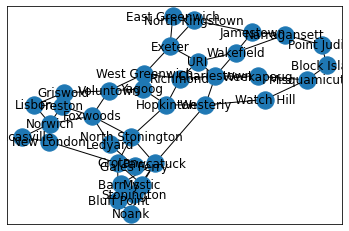

In [22]:
nx.draw_networkx(graph)

In [40]:
tickets = pd.DataFrame(columns=['start place', 'end place', 'shortest length', 'path'])
places = list(nodes)
num = len(places)
for i in range(num-1):
    for j in range(i+1, num):
        s, t = places[i], places[j]
        len_path = nx.shortest_path_length(graph, source=s, target=t, weight='edge')
        path = nx.shortest_path(graph, source=s, target=t, weight='edge')
        tickets = pd.concat([tickets, pd.DataFrame([[s, t, len_path, path]], columns=['start place', 'end place', 'shortest length', 'path'])], axis=0)
tickets.head(10)

,start place,end place,shortest length,path
0,Weekapaug,Block Island,2,"[Weekapaug, Misquamicut, Block Island]"
0,Weekapaug,New London,6,"[Weekapaug, Charlestown, Richmond, Hopkinton, ..."
0,Weekapaug,Foxwoods,5,"[Weekapaug, Charlestown, Richmond, West Greenw..."
0,Weekapaug,North Kingstown,4,"[Weekapaug, Charlestown, Wakefield, Jamestown,..."
0,Weekapaug,West Greenwich,3,"[Weekapaug, Charlestown, Richmond, West Greenw..."
0,Weekapaug,Narragansett,3,"[Weekapaug, Charlestown, Wakefield, Narragansett]"
0,Weekapaug,Griswold,5,"[Weekapaug, Charlestown, Richmond, West Greenw..."
0,Weekapaug,Misquamicut,1,"[Weekapaug, Misquamicut]"
0,Weekapaug,Point Judith,3,"[Weekapaug, Misquamicut, Block Island, Point J..."
0,Weekapaug,Norwich,6,"[Weekapaug, Charlestown, Richmond, West Greenw..."


In [ ]:
# res.to_excel('../chuhanli/documents/TicketToRide.xlsx', index_label=False)